In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import scipy.stats as stats
pd.set_option('display.max_columns', None)

# Dataset

In [2]:
df = pd.read_csv("dataset/sbom_list.csv") # general
df_detail = pd.read_csv("dataset/dependency_list.csv")

In [3]:
def fix_typo(text):
    if text == "cyclnedx_xml":
        return "cyclonedx_xml"
    return text
df["format"] = df.format.apply(lambda x: fix_typo(x))

In [4]:
df_detail = df.merge(df_detail, on="sbom_code", how="left")

In [5]:
# The number of unique repositories 
len(pd.unique(df['sbom_code']))

620

In [6]:
df.head()

,sbom_code,name,URL,path,dependencies,licenses,critical,high,medium,low,quality,format,version,successfully_processed,sbomqs_processed,osv_processed,cyclonedx_processed,sbom_utility_processed,pyspdxtools_processed,ntia_processed,cyclonedx_res,sbom_utility_res,pyspdxtools_res,ntia_res,language
0,ARM-software_CMSIS-FreeRTOS_adfcb9a6ba3892bf4d...,CMSIS-FreeRTOS,https://raw.githubusercontent.com/ARM-software...,Source/sbom.spdx,1,1,0,0,0,0,6.52,spdx_spdx,SPDX-2.2,True,True,False,False,False,True,True,False,False,NaN,False,C
1,BonexGoo_Boss2D_ee34d813bda65f8a03eec2477abb9c...,Boss2D,https://raw.githubusercontent.com/BonexGoo/Bos...,Boss2D/addon/cpython-3.12.2_for_boss/Misc/sbom...,30,0,0,1,4,1,0.00,spdx_json,SPDX-2.3,True,False,True,False,True,True,False,False,False,NaN,False,other
2,CactuseSecurity_firewall-orchestrator_747d9d82...,firewall-orchestrator,https://raw.githubusercontent.com/CactuseSecur...,documentation/SBOM/fwo-sbom.json,105,105,0,0,0,0,8.65,cyclonedx_json,1.6,True,True,False,True,True,False,False,True,True,False,False,other
3,Checkmarx_kics_59f46f7b229f2c24ac2afa9757869bc...,kics,https://raw.githubusercontent.com/Checkmarx/ki...,kics.spdx.json,245,246,3,2,8,0,7.10,spdx_json,SPDX-2.3,True,True,True,False,True,True,True,False,False,NaN,False,other
4,DataDog_datadog-ci_264bdb639349be25cb3783b279c...,datadog-ci,https://raw.githubusercontent.com/DataDog/data...,.github/workflows/e2e/sbom-reports/sbom.json,62,62,0,3,4,1,7.81,cyclonedx_json,1.4,True,True,True,True,True,False,False,True,True,False,False,TypeScript


# Versions and formats

In [7]:
# The number of SPDX and CycloneDX repos
df.groupby('format').count()

,sbom_code,name,URL,path,dependencies,licenses,critical,high,medium,low,quality,version,successfully_processed,sbomqs_processed,osv_processed,cyclonedx_processed,sbom_utility_processed,pyspdxtools_processed,ntia_processed,cyclonedx_res,sbom_utility_res,pyspdxtools_res,ntia_res,language
format,,,,,,,,,,,,,,,,,,,,,,,,
cyclonedx_json,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261
cyclonedx_xml,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
spdx_json,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,0,281,281
spdx_spdx,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,0,53,53
spdx_yaml,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2


In [8]:
# Most common versions for each format
df.groupby('version').format.value_counts().reset_index().sort_values('count', ascending=False)

,version,format,count
16,SPDX-2.3,spdx_json,260
9,1.6,cyclonedx_json,90
5,1.4,cyclonedx_json,67
3,1.3,cyclonedx_json,52
7,1.5,cyclonedx_json,48
13,SPDX-2.2,spdx_spdx,32
14,SPDX-2.2,spdx_json,20
17,SPDX-2.3,spdx_spdx,18
10,1.6,cyclonedx_xml,7
4,1.3,cyclonedx_xml,7


# Dependencies

In [9]:
# Dependencies stats
df[df.dependencies !=0].dependencies.describe()

count      620.000000
mean       291.869355
std       1131.237613
min          1.000000
25%         45.000000
50%         93.000000
75%        217.000000
max      17825.000000
Name: dependencies, dtype: float64

In [10]:
# Dependencies stats per format
df.groupby('format').dependencies.describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
format,,,,,,,,
spdx_json,281.0,241.199288,1083.797429,1.0,55.00,97.0,248.00,17825.0
cyclonedx_json,261.0,261.536398,915.464176,1.0,43.00,93.0,167.00,12675.0
spdx_spdx,53.0,339.603774,1116.219863,1.0,1.00,31.0,162.00,6491.0
cyclonedx_xml,23.0,1169.608696,2710.178705,6.0,106.00,199.0,631.00,12675.0
spdx_yaml,2.0,10.500000,3.535534,8.0,9.25,10.5,11.75,13.0


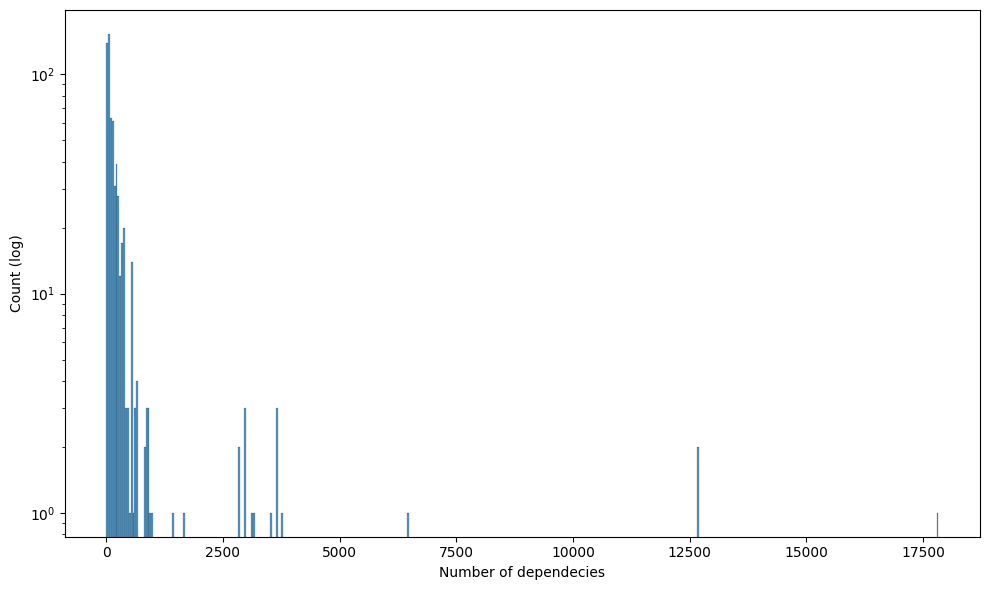

In [11]:
# Stats on deps per project
plt.figure(figsize=(10, 6))
sns.histplot(df.dependencies, kde=False)
plt.xlabel('Number of dependecies')
plt.ylabel('Count (log)')
plt.yscale('log')
plt.tight_layout()
# Show the plot

In [12]:
# Project with max number of deps
maxdeps = df.dependencies.max()
print(maxdeps)
print(df.dependencies.min())
df[df.dependencies == maxdeps].name

17825
1


332    jaeger
Name: name, dtype: object

In [13]:
# Number of projects with no dependencies (it may be good to check why, for example, SBOM declares only License)
len(pd.unique(df[df.dependencies == 0].name))

0

In [14]:
# Empty dependencies for each format. Maybe the fact that there are no deps has something to do with the format rules
df[df.dependencies == 0].groupby('format').size()

Series([], dtype: int64)

In [15]:
# Total dependencies
len(df_detail)

180959

In [16]:
# Unique dependencies
df_detail.name_y.nunique()

25236

In [17]:
# Most used depedencies
df_detail.groupby("name_y").size().reset_index(name="count").sort_values(by=["count"], ascending=False).head(100)

,name_y,count
10122,go.opentelemetry.io/otel/exporters,958
6919,github.com/aws/aws-sdk-go-v2,847
10083,go.opentelemetry.io/collector/config,836
10233,golang.org/x/sys,690
10239,golang.org/x/text,649
...,...,...
9378,github.com/pierrec/lz4,209
7227,github.com/cespare/xxhash,197
9126,github.com/mitchellh/mapstructure,195
9049,github.com/mattn/go-colorable,194


In [18]:
# Percentage of empty deps
cdx = df[df.format.str.contains("spdx")]
spx = df[df.format.str.contains("cyclonedx")]

print((len(cdx[cdx.dependencies == 0]) / len(cdx)) * 100)
print((len(spx[spx.dependencies == 0]) / len(spx)) * 100)

0.0
0.0


In [19]:
# Number of dependencies ecosystems
df_detail["ecosystem"] = df_detail.location.str.extract(r':([^/]+)/')
df_detail.ecosystem.dropna().value_counts()

ecosystem
golang                 80180
maven                  32097
npm                    17137
deb                     8645
cargo                   8545
rpm                     4421
pypi                    4317
nuget                   2010
apk                     1107
gem                      945
github                   878
pub                      838
composer                 205
cocoapods                 90
ACTIONS                   84
oci                       46
otp                       42
generic                   40
githubactions             23
swid                       9
RUST                       5
github.com                 3
dotnet                     2
google-code-archive        2
sourceware                 2
Name: count, dtype: int64

In [20]:
df_detail.groupby("sbom_code")["ecosystem"].nunique()

sbom_code
ARM-software_CMSIS-FreeRTOS_adfcb9a6ba3892bf4d39daa212a8f37d36c2f9f9_viu0w1f5_sbom.spdx                  0
BonexGoo_Boss2D_ee34d813bda65f8a03eec2477abb9ce8f2a6978d_lgr3ggu1_sbom.spdx.json                         1
CactuseSecurity_firewall-orchestrator_747d9d8278f97aae11560005b152efc89d74ad40_8xb3gwj0_fwo-sbom.json    1
Checkmarx_kics_59f46f7b229f2c24ac2afa9757869bc21095c12c_rf2fimkj_kics.spdx.json                          2
DataDog_datadog-ci_264bdb639349be25cb3783b279ceb8dd427f9e89_t4vm86zg_sbom.json                           1
                                                                                                        ..
volution_z-run_a6274842ebcefd547d0ba84e345f42a6bb691916_q27mjwhc_cyclonedx.json                          1
volution_z-tokens_2b53be865f92ed0594f0403c4fb4a9c6760bd722_nyhc5vg4_cyclonedx.json                       1
zeux_pugixml_657c33ae34dbc1d43ae5a5336599bebc7c93688f_hego416x_sbom.cdx.json                             0
zeux_pugixml_release_737o8c

In [21]:
# Average number of ecosystem per project
df_detail.dropna(subset=["ecosystem"]).groupby("name_y")['ecosystem'].nunique().describe()

count    20439.000000
mean         1.008660
std          0.101719
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ecosystem, dtype: float64

# SBOM quality

In [71]:
# SBOM quality stats
df_clean_quality = df[df.quality!=0]
df_clean_quality.quality.describe()

count    613.000000
mean       7.070245
std        0.884311
min        3.040000
25%        6.480000
50%        7.320000
75%        7.390000
max        9.420000
Name: quality, dtype: float64

In [72]:
df_clean_quality.groupby('format').quality.describe()

,count,mean,std,min,25%,50%,75%,max
format,,,,,,,,
cyclonedx_json,259.0,6.997915,0.960442,3.04,6.4000,6.95,7.39,9.38
cyclonedx_xml,23.0,7.615652,1.339626,4.35,6.9150,8.17,8.62,8.68
spdx_json,278.0,7.165504,0.546004,4.13,7.3025,7.36,7.39,8.18
spdx_spdx,52.0,6.658846,1.384830,4.35,6.0850,6.09,7.72,9.42
spdx_yaml,1.0,8.170000,NaN,8.17,8.1700,8.17,8.17,8.17


In [73]:
df_clean_quality['extension'] = df_clean_quality.format.apply(lambda x: x.split("_")[1])

/var/folders/kj/6309bkpj25369522dyfd5dxh0000gn/T/ipykernel_49833/213809533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_quality['extension'] = df_clean_quality.format.apply(lambda x: x.split("_")[1])


In [74]:
df_clean_quality['real_format'] = df_clean_quality.format.apply(lambda x: x.split("_")[0])

/var/folders/kj/6309bkpj25369522dyfd5dxh0000gn/T/ipykernel_49833/4285247223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_quality['real_format'] = df_clean_quality.format.apply(lambda x: x.split("_")[0])


In [75]:
df_clean_quality.groupby('real_format').quality.describe()

,count,mean,std,min,25%,50%,75%,max
real_format,,,,,,,,
cyclonedx,282.0,7.048298,1.008035,3.04,6.40,6.95,7.80,9.38
spdx,331.0,7.088943,0.764362,4.13,6.52,7.36,7.39,9.42


In [27]:
df_clean_quality.groupby('extension').quality.describe()

,count,mean,std,min,25%,50%,75%,max
extension,,,,,,,,
json,537.0,7.084674,0.777886,3.04,6.520,7.32,7.39,9.38
spdx,52.0,6.658846,1.384830,4.35,6.085,6.09,7.72,9.42
xml,23.0,7.615652,1.339626,4.35,6.915,8.17,8.62,8.68
yaml,1.0,8.170000,NaN,8.17,8.170,8.17,8.17,8.17


In [ ]:
# Project(s) with best quality
max_quality = df_clean_quality.quality.max()
df_clean_quality[df_clean_quality.quality == max_quality].name

314    cve-bin-tool
316    cve-bin-tool
320    cve-bin-tool
322    cve-bin-tool
325    cve-bin-tool
Name: name, dtype: object

In [76]:
# Project(s) with worst quality
min_quality = df_clean_quality.quality.min()
df_clean_quality[df_clean_quality.quality == min_quality].name

557    engine
Name: name, dtype: object

# Licenses

In [30]:
# Licenses stats
df.licenses.describe()

count     620.000000
mean      107.946774
std       370.995128
min         0.000000
25%         1.000000
50%         1.000000
75%        77.000000
max      3757.000000
Name: licenses, dtype: float64

In [31]:
# Licenses per format
df[df['dependencies']==0].groupby('format').licenses.describe()

,count,mean,std,min,25%,50%,75%,max


In [32]:
# SBOM with max Licenses
max = df.licenses.max()
print(max)
df[df.licenses==max].name

3757


66    camel-quarkus
67    camel-quarkus
Name: name, dtype: object

In [33]:
# SBOM without licenses
len(df[df.licenses==0])

139

In [34]:
# Difference between formats for repo without licenses 
df[df.licenses==0].groupby('format').size()

format
cyclonedx_json    79
cyclonedx_xml      4
spdx_json         45
spdx_spdx         11
dtype: int64

In [35]:
# Percentage of no licenses by format
print(len(cdx[cdx.licenses==0])/len(cdx) * 100)
print(len(spx[spx.licenses==0])/len(spx) * 100)

16.666666666666664
29.225352112676056


In [36]:
clean_licenses = {
    "LicenseRef-http---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-http---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-https---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-https---www.apache.org-licenses-LICENSE-2.0.txt": "Apache-2.0",
    "LicenseRef-https---www.apache.org-licenses-LICENSE-2.0": "Apache-2.0",
    "https://www.apache.org/licenses/LICENSE-2.0.txt" : "Apache-2.0",
    '"Apache-2.0";link="https://www.apache.org/licenses/LICENSE-2.0.txt"' : "Apache-2.0",
    "Apache License, 2.0" : "Apache-2.0",
    "Apache License 2.0" : "Apache-2.0",
    "Apache License 2" : "Apache-2.0",
    "Apache License, Version 2.0" : "Apache-2.0",
    "Apache License Version 2.0" : "Apache-2.0",
    "Apache 2" : "Apache-2.0",
    "Apache" : "Apache-2.0",
    "Apache Software License": "Apache-2.0",
    "Apache Software License, Version 2.0": "Apache-2.0",
    "Apache-2," : "Apache-2.0",
    'Apache-2.0";link="https://www.apache.org/licenses/LICENSE-2.0.txt",' : "Apache-2.0",
    "Apache Software License, Version 2.0" : "Apache-2.0",
    "Apache 2.0" : "Apache-2.0",
    "LicenseRef-254761b1c99a8b9e7be8f9685ae02656d4912af7bf14f6a9b0ac7102a7b893ea" : "",
    #"LicenseRef-LGPLv2-" : "LGPL-2.0",
    "GPL-2.0-only" : "GPL-2.0",
    "GPL-2.0-or-later": "GPL-2.0",
    "http://www.apache.org/licenses/LICENSE-2.0.txt" : "Apache-2.0",
    "LicenseRef-https--www.apache.org-licenses-LICENSE-2.0": "Apache-2.0",
    "..." : '',
    "Standard 'no charge' license: https://gsap.com/standard-license. Club GSAP members get more: https://gsap.com/licensing/. Why GreenSock doesn't employ an MIT license: https://gsap.com/why-license/" : "GSAP",
    "MIT (http://mootools.net/license.txt)": "MIT",
    "http://www.eclipse.org/legal/epl-2.0, https://www.gnu.org/software/classpath/license.html" : "EPL-2.0",
    "http://creativecommons.org/publicdomain/zero/1.0/, https://opensource.org/licenses/BSD-2-Clause" : "CC0",
    'Paul-Hsieh,': '',
    'JPEG,': '',
    'double-metaphone': '',
    'and/or': '',
    'license,': '',
    'libpng,': '',
    'copy,': '',
    'config-h,': '',
    'of': '',
    'Autoconf,': '',
    'person,': '',
    '2-clause': '',
    'exception,': '',
    'Expat,': '',
    'BSD-3,': '',
    'granted': '',
    'other': '',
    'under': '',
    '/': '',
    'later': '',
    'custom,': '',
    '/usr/share/common-licenses/GPL-2.': '',
    'BSD-2-clause-author,': '',
    'configure': '',
    'double-metaphone,': '',
    'SEE LICENSE IN LICENSE.md': '',
    'copying': '',
    'TEXT-TABS,': '',
    'use,': '',
    'way': '',
    'see': '',
    'SunSoft': '',
    'Unicode-DFS-2016': '',
    'is': '',
    'person': '',
    'GPL-2.0-with-classpath-exception': '',
    'hereby': '',
    'This': '',
    'obtaining,': '',
    'font': '',
    'any': '',
    'licensed': '',
    'for': '',
    'The': '',
    'and' : '',
    'to': '',
    'Lesser,':'',
    'use':'',
    'By': '',
    'Podam runs under the MIT license': 'MIT',
    'MIT License':'MIT',
    'GNU LESSER GENERAL PUBLIC LICENSE 2.1' : 'GLGPL-2.1',
    'AFL-2.1,' : 'AFL-2,1',
    'Public-Domain,':'Public-Domain',
    'http://www.eclipse.org/legal/epl-v10.html, http://www.gnu.org/licenses/old-licenses/lgpl-2.1.html' : "EPL-1.0",
    'http://www.opensource.org/licenses/mit-license.php': "MIT",
    'International Program License Agreement (IPLA)': 'IPLA',
    'GNU LESSER GENERAL PUBLIC LICENSE, version 3 (LGPL-3.0)': 'GLGPL-3.0',
    'GENERAL PUBLIC LICENSE, version 3 (GPL-3.0)': 'GPL-3.0'
}

def fix_license(text):
    if (text != '' and text[-1] == ","):
        text = text[:-1]
    if text in clean_licenses:
        return clean_licenses[text]
    if "LicenseRef-" in text:
        r = list(filter(None, "LicenseRef-GPL-3---BISON-EXCEPTION-".split('-')[1:]))
        return "-".join(r)
    return text

In [37]:
# Most common license
licenses = df_detail.licenses_y.dropna().str.split("|")
all_licenses = [l for sublist in licenses for l in sublist]

all_licenses = [fix_license(l) for l in all_licenses]

list(filter(None,list(set(all_licenses))))

['LGPL-2.0',
 'JDOM',
 'LGPL-3.0',
 'HPND',
 'AGPL-V3',
 'BSD-4-clause-California',
 'BSD-2-Clause-FreeBSD',
 'LGPL-2.1-only',
 'GFDL-1.3+-no-invariant',
 'XFree86-1.0',
 '(CC-BY-4.0 AND MIT)',
 '(Apache-2.0 OR EPL-2.0)',
 'OpenLDAP-2.8',
 'GFDL-1.3-only',
 'BSD-2.2-clause',
 'JCG',
 'GFDL-1.2-only',
 'X11',
 'ALv2',
 'GPL2 w/ CPE',
 'BSD-3-clause-variant',
 'HSIEH-BSD',
 'TinySCHEME',
 'WTFPL',
 'BSD-3-Clause-Attribution',
 'Eclipse Distribution License v. 1.0',
 'PubNub Software Development Kit License',
 'ISC-no-attribution',
 'BSD-3-Clause-Google',
 'Oracle Free Use Terms and Conditions (FUTC)',
 'OFL-1.1',
 'W3C',
 'BSL-1.0',
 'BSD-3-Clause',
 'LGPL-2.1-or-later',
 'The QuickFIX Software License, Version 1.0',
 'Unknown License',
 'BSD-style',
 'FSFUL',
 'LGPLv3',
 'Unlicense',
 'Unicode/ICU License',
 'IBM-as-is',
 'BSD-BY-LC-NE',
 'ISC License',
 'The BSD License',
 'BSD',
 'ASF 2.0',
 'GNU Lesser GPL, Version 3',
 'PSF-2.0',
 'The (New) BSD License',
 'GNU General Public Licens

In [38]:
all_licenses = [l for l in all_licenses if l and l != 'NONE']
df_license_stats = pd.DataFrame(all_licenses, columns=['license'])
df_license_stats['license'].apply(lambda x: fix_license(x))
license_counts = df_license_stats['license'].value_counts().reset_index()
license_counts.columns = ['license', 'count']
license_counts['percentage'] = (license_counts['count'] / license_counts['count'].sum()) * 100
license_counts.license.unique()

array(['Apache-2.0', 'MIT', 'GPL-3-BISON-EXCEPTION', 'BSD-3-Clause',
       'GPL-2.0', 'ISC', 'BSD-2-Clause', 'EPL-2.0', 'EPL-1.0', 'MPL-2.0',
       'BSD-Source-Code', 'LGPL-2.1-only', 'LGPL-2.1-or-later',
       'BSD-4-Clause', 'GNU LGPL 3', 'MIT/Apache-2.0', 'GPL-3.0-only',
       'Public Domain', 'Ruby', 'LGPL-3.0-or-later', 'GPL-3.0-or-later',
       'LGPL-3.0-only', 'BSD-style', '0BSD', 'Unicode-3.0', 'CC0-1.0',
       'Bouncy Castle Licence', 'LGPL-2.0-only',
       'Apache Software License 2.0', 'Zlib', 'LGPL-2.0-or-later',
       'Modified BSD', 'CDDL-1.1', 'Unlicense', 'jQuery license',
       'W3C license',
       'GNU General Public License, version 2 with the GNU Classpath Exception',
       'LGPL-2.1', 'MPL-1.1', 'GPL', 'public-domain', 'UPL-1.0', 'X11',
       'Apache-2.0/MIT', 'CC-BY-SA-4.0', 'LGPL-3.0', 'LGPL', 'GPLv2',
       'GNU Lesser General Public License',
       'PubNub Software Development Kit License',
       'GNU LESSER GENERAL PUBLIC LICENSE, Version 3',
  

In [39]:
# Total different unique licenses
len(license_counts)

384

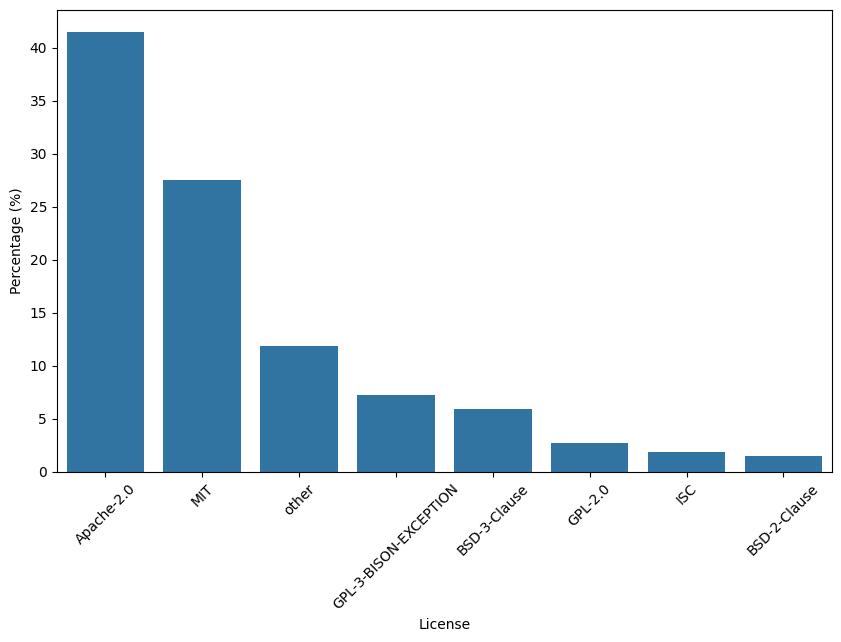

In [40]:
# Aggregate licenses with small percentages into 'other' category
threshold = 1  # percentage threshold to consider as 'other'
license_plotting = license_counts.copy()
license_plotting.loc[license_plotting['percentage'] < threshold, 'license'] = 'other'

# Recalculate the counts and percentages
aggregated_counts = license_plotting.groupby('license').agg({'count': 'sum'}).reset_index()
aggregated_counts['percentage'] = (aggregated_counts['count'] / aggregated_counts['count'].sum()) * 100
aggregated_counts = aggregated_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='license', y='percentage', data=aggregated_counts)
#plt.title('License Percentages (with "other" category)')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.xlabel('License')
plt.show()

# Vulnerabilities

In [77]:
# Fixing the -1 in the CVE columns
cve_cols = ["critical", "high", "medium", "low"]
df[cve_cols] = df[cve_cols].replace(-1, 0)

In [78]:
# Stats an all cve
df["cves_count"] = df[cve_cols].sum(axis=1)

In [79]:
df.cves_count.describe()

count    620.000000
mean       7.614516
std       39.832340
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max      564.000000
Name: cves_count, dtype: float64

In [80]:
df.groupby('format').cves_count.describe()

,count,mean,std,min,25%,50%,75%,max
format,,,,,,,,
cyclonedx_json,261.0,8.954023,49.498386,0.0,0.0,1.0,5.0,564.0
cyclonedx_xml,23.0,44.434783,111.899235,0.0,0.5,8.0,19.5,525.0
spdx_json,281.0,4.576512,10.663456,0.0,1.0,2.0,5.0,122.0
spdx_spdx,53.0,1.433962,5.183218,0.0,0.0,0.0,0.0,32.0
spdx_yaml,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [82]:
# Project with max CVE
max = df.cves_count.max()
df[df.cves_count==max].name

60    dejacode
Name: name, dtype: object

In [ ]:
# Percentage without CVE
len(df[df.cves_count==0])/len(df) * 100

39.516129032258064

In [84]:
# CVE stats by severity
df[cve_cols].describe()

,critical,high,medium,low
count,620.000000,620.000000,620.000000,620.000000
mean,0.556452,2.645161,3.895161,0.517742
std,3.174267,14.643305,20.450902,2.343935
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000
max,56.000000,232.000000,296.000000,37.000000


In [85]:
df_detail['CVEs'].dropna().str.split("|", expand=True).stack().nunique()

2202

In [86]:
len(df_detail['CVEs'].dropna().str.split("|", expand=True).stack())

19225

In [87]:
from collections import Counter
# Split CVEs and Severities
df_severity = df_detail[['CVEs', 'severity']].dropna()
df_severity['CVEs_c'] = df_detail['CVEs'].str.split('|')
df_severity['severity_c'] = df_detail['severity'].str.split('|')

# Initialize a dictionary to count CVEs by severity
severity_counts = {'CRITICAL': Counter(), 'HIGH': Counter(), 'MEDIUM': Counter(), 'LOW': Counter()}

# Iterate through the rows of the DataFrame
for _, row in df_severity.iterrows():
    for cve, severity in zip(row['CVEs_c'], row['severity_c']):
        if severity in severity_counts:
            severity_counts[severity][cve] += 1

# Determine the most occurring CVE for each severity
most_common_cves = {severity: counts.most_common(1)[0] for severity, counts in severity_counts.items() if counts}

# Output the result
most_common_cves

{'CRITICAL': ('CVE-2024-45337', 81),
 'HIGH': ('CVE-2024-45337', 105),
 'MEDIUM': ('CVE-2025-22870', 332),
 'LOW': ('CVE-2024-51744', 25)}

In [88]:
# Most common CVEs
cves = df_detail['CVEs'].dropna().str.split("|")
all_cves = [c for sublist in cves for c in sublist]
df_cves_stats = pd.DataFrame(all_cves, columns=['cves'])
cves_counts = df_cves_stats['cves'].value_counts().reset_index()
cves_counts.columns = ['cves', 'count']
cves_counts['percentage'] = (cves_counts['count'] / cves_counts['count'].sum()) * 100
#cves_counts[cves_counts.cves.str.contains('2011')]
cves_counts.head(10)

,cves,count,percentage
0,CVE-2025-22872,824,4.286086
1,CVE-2025-22870,766,3.984395
2,CVE-2025-22869,510,2.652796
3,CVE-2024-45337,370,1.924577
4,CVE-2025-22871,363,1.888166
5,CVE-2023-45288,320,1.664499
6,CVE-2025-22866,283,1.472042
7,CVE-2024-45336,282,1.466840
8,CVE-2024-45341,282,1.466840
9,CVE-2020-8559,270,1.404421


In [52]:
# Oldest CVE year
cves_counts.cves.str.extract(r'(\d{4})').dropna().min()

0    2005
dtype: object

In [53]:
# Top most occurring CWE
cwes = df_detail['CWEs'].dropna().str.split("|")
all_cwes = [cw for sublist in cwes for cw in sublist]
df_cwes_stats = pd.DataFrame(all_cwes, columns=['cwes'])
cwes_counts = df_cwes_stats['cwes'].value_counts().reset_index()
cwes_counts.columns = ['cwes', 'count']
cwes_counts['percentage'] = (cwes_counts['count'] / cwes_counts['count'].sum()) * 100
cwes_counts.head(10)

,cwes,count,percentage
0,CWE-20,1105,12.663305
1,CWE-400,1000,11.460005
2,CWE-770,746,8.549163
3,CWE-79,609,6.979143
4,CWE-115,387,4.435022
5,CWE-532,271,3.105661
6,CWE-601,207,2.372221
7,CWE-285,192,2.200321
8,CWE-835,160,1.833601
9,CWE-776,151,1.730461


In [54]:
# Stats for CWEs associated to each depedendency
cwes.apply(lambda x: len(x)).describe()

count    2893.000000
mean        3.016246
std         4.858162
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        56.000000
Name: CWEs, dtype: float64

In [55]:
flattened_cwes = [item for sublist in cwes for item in sublist]
print(len(flattened_cwes))
print(len(list(set(flattened_cwes))))

8726
223


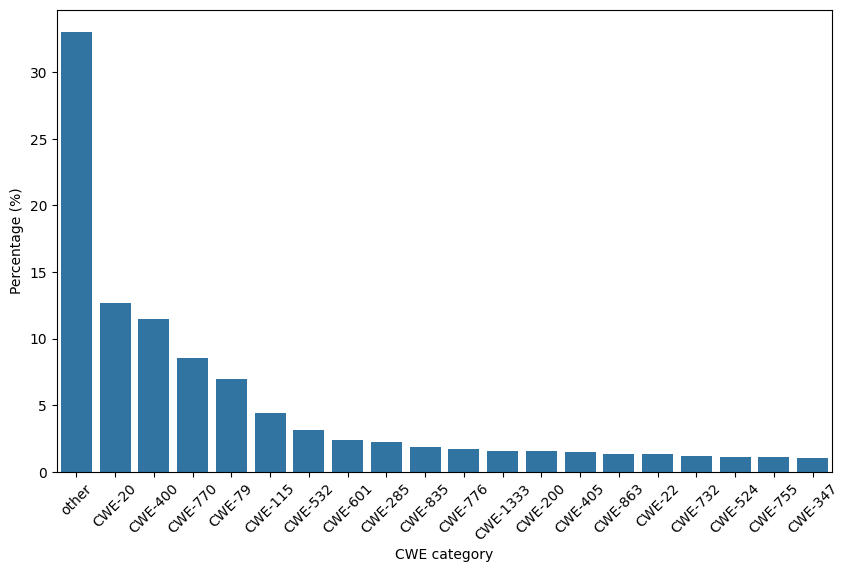

In [56]:
threshold = 1  # percentage threshold to consider as 'other'
cwes_counts.loc[cwes_counts['percentage'] < threshold, 'cwes'] = 'other'
aggregated_counts = cwes_counts.groupby('cwes').agg({'count': 'sum'}).reset_index()
aggregated_counts['percentage'] = (aggregated_counts['count'] / aggregated_counts['count'].sum()) * 100
aggregated_counts = aggregated_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='cwes', y='percentage', data=aggregated_counts)
#plt.title('License Percentages (with "other" category)')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.xlabel('CWE category')
plt.show()

In [57]:
# CVSS severity occurrencies
df_detail.severity.dropna().str.split("|", expand=True).stack().value_counts()

NONE        2401
MEDIUM      2354
HIGH        1488
CRITICAL     324
LOW          284
Name: count, dtype: int64

In [58]:
# CVSS criticality
df_detail.criticality.dropna().str.split("|", expand=True).stack().str.extract(r'CVSS:(\d\.\d)')[0].unique()

array(['3.1', '4.0', '3.0'], dtype=object)

# Relationship types

In [59]:
# Stats about relationship types for each dependency
df_detail.relationship_types.dropna().str.split("|").apply(lambda x: len(x)).describe()

count    67245.000000
mean         5.748621
std        117.385092
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max      17824.000000
Name: relationship_types, dtype: float64

In [60]:
# Most common relationship types (in %)
relationships = df_detail.relationship_types.dropna().str.split("|", expand=True).stack().str.replace("dependsOn", "DEPENDS_ON").value_counts(normalize=True)*100

In [61]:
relationships

CONTAINS                  65.647005
OTHER                     16.235261
DEPENDENCY_OF             10.205243
DEPENDS_ON                 7.816000
FILE_MODIFIED              0.056911
BUILD_DEPENDENCY_OF        0.015004
DYNAMIC_LINK               0.009313
VARIANT_OF                 0.005174
GENERATED_FROM             0.003104
STATIC_LINK                0.002846
BUILD_TOOL_OF              0.001552
OPTIONAL_DEPENDENCY_OF     0.001035
RUNTIME_DEPENDENCY_OF      0.000776
PREREQUISITE_FOR           0.000776
Name: proportion, dtype: float64

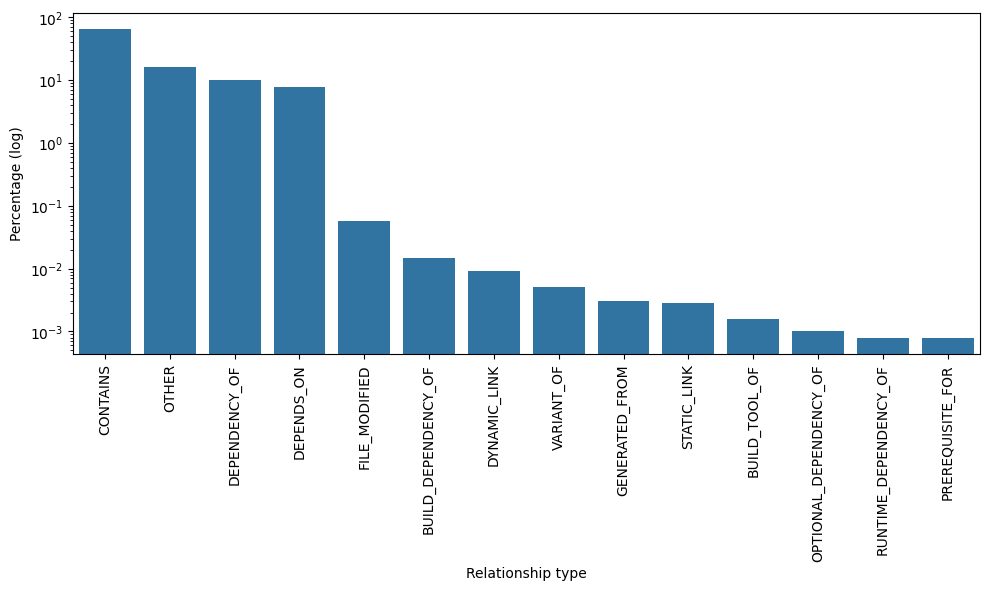

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(relationships)
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel("Relationship type")
plt.ylabel("Percentage (log)")
plt.tight_layout()